In [ ]:
# @title "A Multi-Input Ensemble Model for Churn Prediction using RNN, LSTM, and GRU Architectures with Hyperparameter Optimization.
# Key hightlight are;
# 1. Multi-Input: Captures the 3 types of inputs
# 2. Ensemble: Shows how the models are merged together
# 3. Churn Prediction task: Explains the end goal application
# 4. RNN/LSTM/GRU Architectures: Enumerates the specific model types used
# 5. Hyperparameter Optimization: Indicates the tuning applied

In [1]:
# @title Load and Prep data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import plot_model

# Load the data
# Assuming 'data' is the DataFrame containing your dataset
# Replace 'data.csv' with the actual file name or path if you're loading from a file
data = pd.read_csv('SampleDataSet.csv')

# Drop unnecessary columns
data = data.drop(['Geography', 'Card Type', 'Surname'], axis=1)

# Handle categorical variables
le = LabelEncoder()
# data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])
# data['Card Type'] = le.fit_transform(data['Card Type'])

# Handle missing values if any
data = data.dropna()

# Split the data into features and labels
X = data.drop('Exited', axis=1)
y = data['Exited']

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

RNN MODEL: ----------------------------------------------------------->
Epoch 1/10
18/18 [==============================] - 6s 102ms/step - loss: 0.4725 - accuracy: 0.8214 - val_loss: 0.2658 - val_accuracy: 0.9714
Epoch 2/10
18/18 [==============================] - 0s 23ms/step - loss: 0.1902 - accuracy: 0.9786 - val_loss: 0.1376 - val_accuracy: 0.9857
Epoch 3/10
18/18 [==============================] - 0s 24ms/step - loss: 0.1036 - accuracy: 0.9911 - val_loss: 0.0984 - val_accuracy: 0.9857
Epoch 4/10
18/18 [==============================] - 0s 25ms/step - loss: 0.0714 - accuracy: 0.9911 - val_loss: 0.0826 - val_accuracy: 0.9857
Epoch 5/10
18/18 [==============================] - 0s 27ms/step - loss: 0.0565 - accuracy: 0.9911 - val_loss: 0.0780 - val_accuracy: 0.9857
Epoch 6/10
18/18 [==============================] - 1s 28ms/step - loss: 0.0504 - accuracy: 0.9911 - val_loss: 0.0800 - val_accuracy: 0.9857
Epoch 7/10
18/18 [==============================] - 0s 19ms/step - loss: 0.0440 -

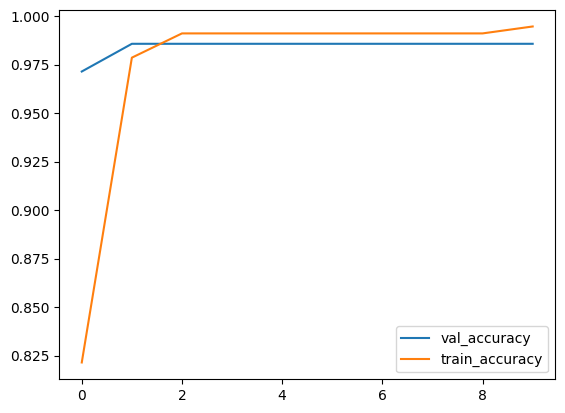

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
LSTM MODEL:  ----------------------------------------------------------->
Epoch 1/10
18/18 [==============================] - 7s 90ms/step - loss: 0.6570 - accuracy: 0.7464 - val_loss: 0.5879 - val_accuracy: 0.8071
Epoch 2/10
18/18 [==============================] - 0s 14ms/step - loss: 0.5123 - accuracy: 0.8179 - val_loss: 0.4932 - val_accuracy: 0.8000
Epoch 3/10
18/18 [==============================] - 0s 13

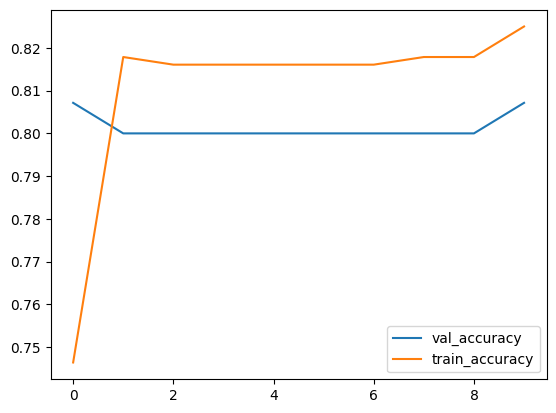

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
GRU MODEL: ----------------------------------------------------------->
Epoch 1/10
18/18 [==============================] - 4s 54ms/step - loss: 0.6343 - accuracy: 0.8036 - val_loss: 0.5682 - val_accuracy: 0.7929
Epoch 2/10
18/18 [==============================] - 0s 12ms/step - loss: 0.4943 - accuracy: 0.8304 - val_loss: 0.4428 - val_accuracy: 0.8071
Epoch 3/10
18/18 [==============================] - 0s 

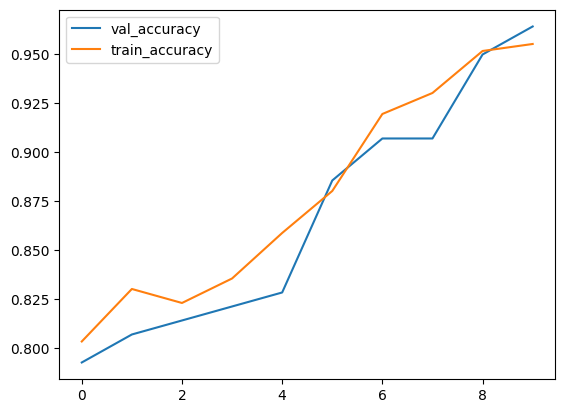

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                7950      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8001 (31.25 KB)
Trainable params: 8001 (31.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [2]:
# @title All Models Build
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense, GRU

# RNN Model
def define_rnn_model():
  rnn_model = Sequential()
  rnn_model.add(SimpleRNN(50, input_shape=(X_train.shape[1], 1)))
  rnn_model.add(Dense(1, activation='sigmoid'))
  rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return rnn_model

# LSTM Model
def define_lstm_model():
  lstm_model = Sequential()
  lstm_model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
  lstm_model.add(Dense(1, activation='sigmoid'))
  lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return lstm_model

# GRU Model
def define_gru_model():
  gru_model = Sequential()
  gru_model.add(GRU(50, input_shape=(X_train.shape[1], 1)))
  gru_model.add(Dense(1, activation='sigmoid'))
  gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return gru_model

# Define RNN, LSTM and GRU models
rnn_model = define_rnn_model()
lstm_model = define_lstm_model()
gru_model = define_gru_model()


# Plot training and validation accuracy / loss graphs: On models
print("RNN MODEL: ----------------------------------------------------------->")

# Train RNN model
history = rnn_model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=10, batch_size=32)

plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.legend()
plt.show()

print(rnn_model.summary())


print("LSTM MODEL:  ----------------------------------------------------------->")

# Train LSTM model
history = lstm_model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=10, batch_size=32)

plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.legend()
plt.show()

print(lstm_model.summary())

print("GRU MODEL: ----------------------------------------------------------->")

# Train GRU model
history = gru_model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=10, batch_size=32)

plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.legend()
plt.show()

print(gru_model.summary())

In [3]:
!pip install ipympl

Support for third party widgets will remain active for the duration of the session. To disable support:

In [4]:
# !pip uninstall matplotlib -y
!pip install matplotlib

In [5]:
from google.colab import output
output.enable_custom_widget_manager()

In [6]:
from google.colab import output
output.disable_custom_widget_manager()

In [7]:
!pip install pydot

In [9]:
!pip install git+https://github.com/keras-team/keras-contrib.git

  Cloning https://github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-anrlw6bp
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-contrib.git /tmp/pip-req-build-anrlw6bp
  Resolved https://github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done


Epoch 1/10
18/18 [==============================] - 16s 279ms/step - loss: 0.6832 - accuracy: 0.8054 - val_loss: 0.5603 - val_accuracy: 0.8357
Epoch 2/10
18/18 [==============================] - 1s 44ms/step - loss: 0.5524 - accuracy: 0.8643 - val_loss: 0.5132 - val_accuracy: 0.8929
Epoch 3/10
18/18 [==============================] - 1s 51ms/step - loss: 0.5329 - accuracy: 0.8679 - val_loss: 0.5042 - val_accuracy: 0.8929
Epoch 4/10
18/18 [==============================] - 1s 49ms/step - loss: 0.4944 - accuracy: 0.8786 - val_loss: 0.4962 - val_accuracy: 0.8429
Epoch 5/10
18/18 [==============================] - 1s 41ms/step - loss: 0.4624 - accuracy: 0.8696 - val_loss: 0.4825 - val_accuracy: 0.8357
Epoch 6/10
18/18 [==============================] - 1s 37ms/step - loss: 0.4444 - accuracy: 0.8464 - val_loss: 0.4703 - val_accuracy: 0.8071
Epoch 7/10
18/18 [==============================] - 1s 37ms/step - loss: 0.4341 - accuracy: 0.8304 - val_loss: 0.4514 - val_accuracy: 0.8000
Epoch 8/10


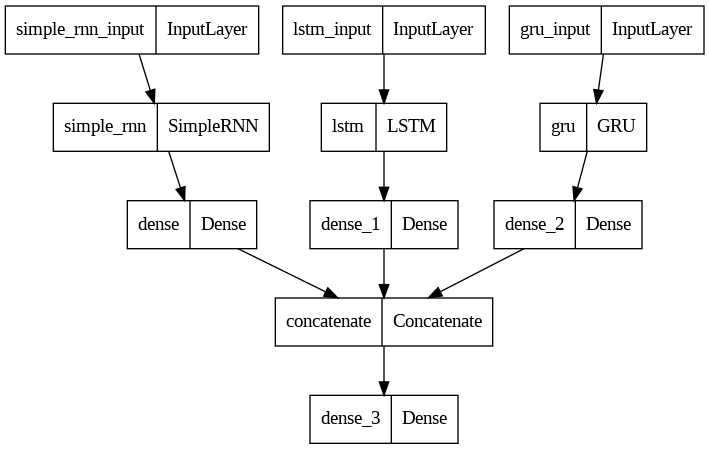

In [10]:
# @title Merge and Training
# Merge models in to concentrate and output with a dense
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import classification_report
%matplotlib widget
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.pyplot.close('all')
matplotlib.use('Agg')
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense, GRU
from keras.models import Model
from keras.layers import concatenate
from keras.regularizers import l2
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
import pydot
from keras.utils import plot_model


# # TNR models
tnr_model = concatenate([rnn_model.output, lstm_model.output, gru_model.output])
final_output = Dense(1, activation='sigmoid')(tnr_model)

# Create and compile the merged model
trn_final_model = Model(inputs=[rnn_model.input, lstm_model.input, gru_model.input], outputs=final_output)
trn_final_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the merged model

history = trn_final_model.fit([X_train]*3, y_train,
                              validation_split=0.2,
                              epochs=10, batch_size=32)


def plot_accuracy_curves(history):
  """Plots the accuracy curves for the training and validation sets."""

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Training', 'Validation'])
  plt.show()



def plot_loss_curves(history):
  """Plots the loss curves for the training and validation sets."""

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Training', 'Validation'])
  plt.show()



trn_final_model.summary()
plot_model(
    trn_final_model,
    show_shapes=False,
    show_layer_names=True,
    to_file='trn_final_model.png'
)



In [11]:
pip install keras-tuner


In [12]:
pip install keras-tuner --upgrade

In [27]:
# @title Evaluate model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import SimpleRNN, LSTM, Dense, GRU, concatenate, Input
from keras_tuner import Hyperband
from keras_tuner.engine.hyperparameters import HyperParameters


def evaluate_model(model, x_test, y_test):
  predictions = model.predict(x_test)
  loss, accuracy = model.evaluate(x_test, y_test)
  print(f"Loss: {loss:.3f}, Accuracy: {accuracy:.3f}")
  print(classification_report(y_test, predictions > 0.5))

history = trn_final_model.fit([X_test]*3, y_test,
                              validation_split=0.2,
                              epochs=10, batch_size=32)

# Evaluate the model with 3 inputs
loss, accuracy = trn_final_model.evaluate([X_test, X_test, X_test], y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Make predictions
predictions = trn_final_model.predict([X_test]*3)
print(classification_report(y_test, predictions > 0.5))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


# Plot accuracy and loss curves
plot_accuracy_curves(history)
plot_loss_curves(history)

# def plot_accuracy_curves(history):
#   """Plots the accuracy curves for the test and validation sets."""

#   plt.plot(history.history['accuracy'])
#   plt.plot(history.history['val_accuracy'])
#   plt.title('Accuracy')
#   plt.xlabel('Epoch')
#   plt.ylabel('Accuracy')
#   plt.legend(['Test', 'Validation'])
#   plt.show()

# def plot_loss_curves(history):
#   """Plots the loss curves for the test and validation sets."""

#   plt.plot(history.history['loss'])
#   plt.plot(history.history['val_loss'])
#   plt.title('Loss')
#   plt.xlabel('Epoch')
#   plt.ylabel('Loss')
#   plt.legend(['Test', 'Validation'])
#   plt.show()

# Define global variables
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
val_x = X_val
val_y = y_val

# Model tuning
def create_tunable_model(hp):

  rnn_input = Input(shape=(X_train.shape[1], 1))
  lstm_input = Input(shape=(X_train.shape[1], 1))
  gru_input = Input(shape=(X_train.shape[1], 1))

  inputs = [rnn_input, lstm_input, gru_input]

  # Create the three models
  rnn_out = SimpleRNN(hp.Int('rnn_units', 64, 128))(rnn_input)
  lstm_out = LSTM(hp.Int('lstm_units', 64, 128))(lstm_input)
  gru_out = GRU(hp.Int('gru_units', 64, 128))(gru_input)

  # outputs = Dense(1)(x)

  # Concatenate the outputs of the three models
  x = concatenate([rnn_out, lstm_out, gru_out])
  x = Dense(hp.Int('units', 64, 128), activation='relu')(x)
  outputs = Dense(1, activation='sigmoid')(x)


  # Create model
  model = Model(inputs=inputs, outputs=outputs)
  # Compile model
  model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']), loss = "binary_crossentropy", metrics=['accuracy'])

  return model



# Create the tuner
tuner = Hyperband(create_tunable_model, objective='val_accuracy', max_epochs=10)
tuner.search(x=[[X_train, X_train, X_train]], y=y_train, validation_data=([val_x, val_x, val_x], val_y))
# tuner.search(x=[X_train]*3, y=y_train, validation_data=(val_x, val_y))

best_model = tuner.get_best_models()[0]
evaluate_model(best_model, [X_test]*3, y_test)
tuner.results_summary()
best_hp = tuner.get_best_hyperparameters()[0]

rnn_input = Input(shape=(X_train.shape[1], 1))
lstm_input = Input(shape=(X_train.shape[1], 1))
gru_input = Input(shape=(X_train.shape[1], 1))
inputs = [rnn_input, lstm_input, gru_input]

rnn_units = best_hp.get('rnn_units')
rnn_out = SimpleRNN(rnn_units)(rnn_input)

lstm_units = best_hp.get('lstm_units')
lstm_out = LSTM(lstm_units)(lstm_input)

gru_units = best_hp.get('gru_units')
gru_out = GRU(gru_units)(gru_input)

x = concatenate([rnn_out, lstm_out, gru_out])
x = Dense(128, activation='relu')(x)
# x = Dense(best_hp.get('dense_1_units'), activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

final_model = Model(inputs=inputs, outputs=outputs)
final_model.compile(optimizer=best_hp.get('optimizer'), loss='binary_crossentropy', metrics=['accuracy'])




Epoch 1/10
8/8 [==============================] - 2s 87ms/step - loss: 0.3581 - accuracy: 0.8625 - val_loss: 0.4308 - val_accuracy: 0.8500
Epoch 2/10
8/8 [==============================] - 0s 24ms/step - loss: 0.3592 - accuracy: 0.8833 - val_loss: 0.4275 - val_accuracy: 0.8500
Epoch 3/10
8/8 [==============================] - 0s 23ms/step - loss: 0.3533 - accuracy: 0.8667 - val_loss: 0.4299 - val_accuracy: 0.8167
Epoch 4/10
8/8 [==============================] - 0s 23ms/step - loss: 0.3481 - accuracy: 0.8875 - val_loss: 0.4239 - val_accuracy: 0.8667
Epoch 5/10
8/8 [==============================] - 0s 25ms/step - loss: 0.3435 - accuracy: 0.9000 - val_loss: 0.4129 - val_accuracy: 0.8667
Epoch 6/10
8/8 [==============================] - 0s 24ms/step - loss: 0.3422 - accuracy: 0.8833 - val_loss: 0.4157 - val_accuracy: 0.8500
Epoch 7/10
8/8 [==============================] - 0s 23ms/step - loss: 0.3463 - accuracy: 0.8958 - val_loss: 0.4156 - val_accuracy: 0.8500
Epoch 8/10
8/8 [===========

In [39]:
# @title Final Evaluation
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, roc_auc_score
import tensorflow as tf

print(final_model.summary())


# Evaluate the model
loss = final_model.evaluate([X_test]*3, y_test)
y_pred = final_model.predict([X_test]*3)

# Convert probabilities to binary predictions
binary_predictions = (y_pred > 0.5).astype(int)

# Compute accuracy
accuracy = accuracy_score(y_test, binary_predictions)

print(f"Loss: {loss}, Accuracy: {accuracy}")

# Visualize Accuracy/Loss Curves
history = final_model.fit([X_test]*3, y_test,
                          validation_split=0.2,
                          epochs=10, batch_size=32)

# Check available metrics in the history
print(history.history.keys())

# Plot accuracy
if 'accuracy' in history.history:
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.legend(['train', 'val'])
    plt.title('Accuracy')
    plt.show()
else:
    print("Accuracy metric not found in history.")

# Plot loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['train', 'val'])
plt.title('Loss')
plt.show()

# Model Analysis
predictions = final_model.predict([X_test, X_test, X_test])
print("classification_report:")
print(classification_report(y_test, y_pred > 0.5))
print("confusion_matrix:")
print(confusion_matrix(y_test, y_pred > 0.5))

X_test_0 = X_test # Make 3 references
X_test_1 = X_test
X_test_2 = X_test

y_probas = final_model.predict([X_test_0, X_test_1, X_test_2])


precision, recall, thresholds = precision_recall_curve(y_test, y_probas)
auc_score = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_probas)

print(f"AUC-PRC: {auc_score}, ROC AUC: {roc_auc}")

#  plot PR and ROC curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probas)

plt.plot(recall, precision)
plt.title("Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_probas)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# # ------------------------------------------------------------------------------------ #
# # PREDICTIONS ON NEW DATA ***(OPTIONAL)
# new_data = get_new_data()

# predictions = final_model.predict(new_data)
# predicted_classes = predictions > 0.5

# # -------------------------------------------------------------------------------------  #

# # FOR PRODUCTION PREDICTIONS ***(OPTIONAL)

# # Load latest final model
# model = tf.keras.models.load_model('final_model.h5')

# # Get real-time input data
# new_data = get_request_data()

# # Preprocess
# new_data = preprocess(new_data)

# # Predict
# predictions = model.predict(new_data)
# predicted_classes = predictions > 0.5

# # Send response
# send_response(predicted_classes)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 14, 1)]              0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 14, 1)]              0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 14, 1)]              0         []                            
                                                                                                  
 simple_rnn_1 (SimpleRNN)    (None, 105)                  11235     ['input_4[0][0]']             
                                                                                            